In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
301043,301043,196492,52939,Which is the best book to learn java from scra...,What are the best books to learn Java?,0
217362,217362,8647,110192,Why do some people look much younger than thei...,Why do I look younger in the mirror than in ph...,0
83906,83906,141937,141938,What is the average cost to produce a course l...,What is the average reach on FB of cost per do...,0
89867,89867,150918,150919,What is the BJP government doing?,How is BJP Government?,0
164792,164792,255986,255987,Which is the best website to download free Bol...,From which websites can I download bollywood m...,1
103215,103215,170647,170648,What are you putting off until tomorrow what y...,Why is tomorrow going to be better for you tha...,0
376586,376586,98807,123036,Is wwe fake?,Is fighting in wwe real or fake?,1
326955,326955,453329,453330,Is Mark Cuban on Quora?,Is Mark Cuban Cuban?,0
212153,212153,317163,179417,What is the best book for the GATE in mechanical?,Which books/study materials should I follow fo...,0
239455,239455,351031,351032,How possible was for the Communist Party to st...,How did communist party won and ruled West Ben...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

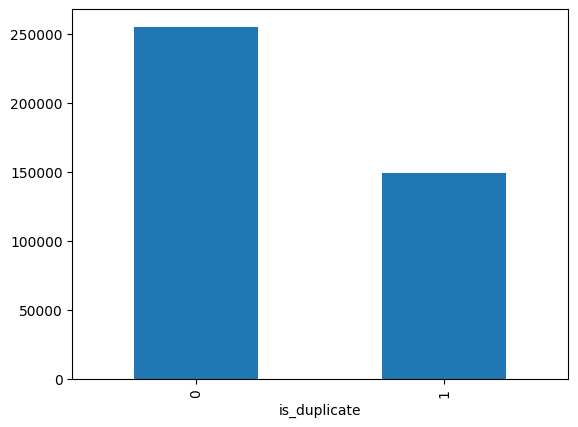

In [7]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions: ', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions that appear more than once: ', x[x].shape[0])

Number of unique questions:  537933
Number of questions that appear more than once:  111780


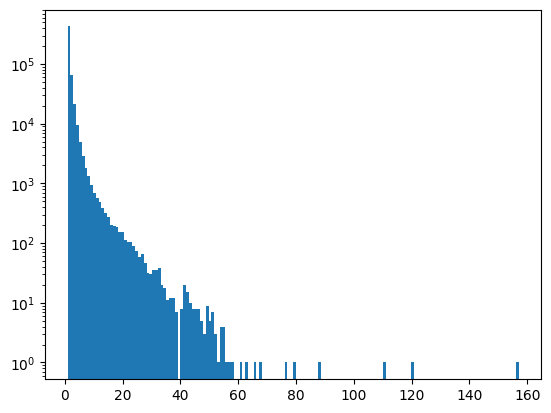

In [9]:
# Histogram of repeated questions
plt.hist(qid.value_counts(), bins=160)
plt.yscale('log')
plt.show()

#**Simple BOW**



In [10]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
new_df = df.sample(50000, random_state=42)

In [12]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [13]:
ques_df = new_df[['question1','question2']]
ques_df.dropna(inplace=True)
ques_df.head()

<ipython-input-13-35972be9d60c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df.dropna(inplace=True)


,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
368101,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...
70497,Which is more advisable and better material fo...,What is the best server setup for buddypress?
226567,How do I improve logical programming skills?,How can I improve my logical skills for progra...
73186,How close we are to see 3rd world war?,How close is a World War III?


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1'])+ list(ques_df['question2'])

cv = CountVectorizer(max_features = 3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [15]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [16]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
174632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
337708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
8067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,:-1].values, temp_df.iloc[:,-1].values, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.758

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7367